<a href="https://colab.research.google.com/github/Saucymukhim/New/blob/main/LastEpisode_SAUCY_MUKHIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SECTION 1: SETUP & INSTALLATION

In [ ]:
from google.colab import drive
from IPython.display import display, HTML

def card(msg, bg):
    display(HTML(f"<div style='background:{bg};padding:14px;border-radius:10px;"
                 "color:white;font-family:Segoe UI;box-shadow:0 4px 14px #0005'>"
                 f"<b>{msg}</b></div>"))

card(" Connecting to Google Drive…", "linear-gradient(135deg,#232526,#414345)")
drive.mount("/content/drive")
card(" Drive mounted at /content/drive", "linear-gradient(135deg,#11998e,#38ef7d)")


Mounted at /content/drive


In [ ]:
from IPython.display import display, HTML

path = "/content/drive/MyDrive/SaucyDataset"

display(HTML(f"<div style='background:linear-gradient(135deg,#141e30,#243b55);"
             "padding:14px;border-radius:10px;color:white;"
             "font-family:Segoe UI;box-shadow:0 4px 14px #0005'>"
             f"<b>📁 Dataset directory</b><br><code>{path}</code></div>"))

%cd {path}


/content/drive/MyDrive/SaucyDataset


In [ ]:
# Install required packages for the environment
!pip uninstall torch torchvision torchaudio -y
!pip install torch torchvision torchaudio --no-cache-dir
!pip install --upgrade -q timm scikit-learn seaborn rich
!pip install grad-cam
!pip install optuna
!pip install pytorch-grad-cam
!pip install albumentations
!pip install torchmetrics
!pip install opencv-python


Found existing installation: torch 2.9.0+cu126
Uninstalling torch-2.9.0+cu126:
  Successfully uninstalled torch-2.9.0+cu126
Found existing installation: torchvision 0.24.0+cu126
Uninstalling torchvision-0.24.0+cu126:
  Successfully uninstalled torchvision-0.24.0+cu126
Found existing installation: torchaudio 2.9.0+cu126
Uninstalling torchaudio-2.9.0+cu126:
  Successfully uninstalled torchaudio-2.9.0+cu126
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.7/915.7 MB 305.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 326.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 270.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 288.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 204.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 278.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.0/310.0 kB 32.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.33.0 requires rich<14,>=12.4.4, but you have rich 14.3.2 which is incompatible.
fastai 2.8.6 requires torch<2.10,>=1.10, but you have torch 2.10.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=e5854ea13a0e392ec01629dae1c01660b2276a61bbff44a074a71d111ea71c5b
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successful

In [ ]:
# Imports
import os, json, random, warnings
import torch, torch.nn as nn, torch.optim as optim, torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision import datasets, transforms
import timm, cv2, optuna
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score, precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from torchmetrics import CalibrationError
from tqdm import tqdm
from datetime import datetime

warnings.filterwarnings("ignore")

from IPython.display import display, HTML
display(HTML("<div style='background:#020617;padding:10px;border-radius:8px;"
             "color:#86efac;font-family:Segoe UI'>"
             "📦 <b>Libraries imported successfully</b> — system ready</div>"))


SECTION 2: CONFIGURATION

In [ ]:
# Central configuration class
class Config:
    """Configuration class for the bone fracture detection project."""

    def __init__(self):
        self.DATA_PATH = "/content/drive/MyDrive/SaucyDataset"
        self.OUTPUT_DIR = "/content/drive/MyDrive/SaucyDataset_Output"
        os.makedirs(self.OUTPUT_DIR, exist_ok=True)

        self.MODEL_NAME = 'tf_efficientnetv2_s.in1k'
        self.IMAGE_SIZE = 256
        self.BATCH_SIZE = 8
        self.EPOCHS = 2
        self.LEARNING_RATE = 1e-4
        self.NUM_CLASSES = 2

        self.D_MODEL = 256
        self.NHEAD = 8
        self.NUM_ENCODER_LAYERS = 4
        self.DIM_FEEDFORWARD = 2048
        self.DROPOUT = 0.1

        self.K_FOLDS = 2
        self.SEED = 42

        # Weakly supervised segmentation settings
        self.RUN_WEAK_SEG = True
        self.SEG_EPOCHS = 2
        self.SEG_LEARNING_RATE = 1e-4
        self.SEG_THRESHOLD = 0.5
        self.SEG_THRESHOLD_MODE = "otsu"  # "otsu" or "adaptive"
        self.SEG_MORPH_KERNEL = 3
        self.SEG_MORPH_ITER = 1

        # Full segmentation (mask-supervised) settings
        self.RUN_FULL_SEG = False
        self.SEG_DATA_PATH = "/content/drive/MyDrive/SaucyDataset_Seg"
        self.SEG_EPOCHS_FULL = 2
        self.SEG_LR_FULL = 1e-4
        self.SEG_PSEUDO_MASK_DIR = os.path.join(self.OUTPUT_DIR, "pseudo_masks")

        # Fast mode toggles
        self.FAST_MODE = False
        self.FAST_EPOCHS = 3
        self.FAST_TRIALS = 1
        self.FAST_SEG_EPOCHS = 2

        # Early stopping (validation loss)
        self.EARLY_STOPPING = True
        self.EARLY_STOPPING_PATIENCE = 5
        self.EARLY_STOPPING_MIN_DELTA = 1e-4
        self.USE_BEST_LOSS_CHECKPOINT = True

        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    def apply_fast_mode(self):
        if not self.FAST_MODE:
            return
        self.EPOCHS = min(self.EPOCHS, self.FAST_EPOCHS)
        self.K_FOLDS = 2
        self.SEG_EPOCHS = min(self.SEG_EPOCHS, self.FAST_SEG_EPOCHS)
        self.SEG_EPOCHS_FULL = min(self.SEG_EPOCHS_FULL, self.FAST_SEG_EPOCHS)


CFG = Config()
CFG.apply_fast_mode()

from IPython.display import display, HTML
display(HTML(f"<div style='background:#020617;padding:10px;border-radius:8px;'"
             "color:#93c5fd;font-family:Segoe UI'>"
             f"⚙️ <b>Config loaded</b> | Device: <code>{CFG.device}</code></div>"))


SECTION 3: DATA HANDLING & TRANSFORMATIONS

In [ ]:
# Data handling & transformations
class DataTransforms:
    """Class to handle data transformations for different phases (train, val, test, tta)."""

    @staticmethod
    def get_transforms(image_size, phase='train'):
        if phase == 'train':
            return transforms.Compose([
                transforms.RandomResizedCrop(image_size),
                transforms.RandomHorizontalFlip(),
                transforms.RandomRotation(10),
                transforms.ColorJitter(0.2, 0.2, 0.2, 0.1),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
            ])
        elif phase in ['val', 'test']:
            return transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(image_size),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
            ])
        elif phase == 'tta':
            return [
                transforms.Compose([
                    transforms.Resize(256),
                    transforms.CenterCrop(image_size),
                    transforms.ToTensor(),
                    transforms.Normalize([0.485, 0.456, 0.406],
                                         [0.229, 0.224, 0.225])
                ]),
                transforms.Compose([
                    transforms.Resize(256),
                    transforms.CenterCrop(image_size),
                    transforms.RandomHorizontalFlip(1.0),
                    transforms.ToTensor(),
                    transforms.Normalize([0.485, 0.456, 0.406],
                                         [0.229, 0.224, 0.225])
                ]),
                transforms.Compose([
                    transforms.Resize(256),
                    transforms.CenterCrop(image_size),
                    transforms.RandomRotation(10),
                    transforms.ToTensor(),
                    transforms.Normalize([0.485, 0.456, 0.406],
                                         [0.229, 0.224, 0.225])
                ])
            ]
        else:
            raise ValueError(f"Unknown phase: {phase}")


class DatasetManager:
    """Class to handle dataset loading, splits, and dataloaders."""

    @staticmethod
    def load_dataset(data_path):
        if not os.path.exists(data_path):
            raise FileNotFoundError(f"Data path not found: {data_path}")
        return data_path

    @staticmethod
    def create_dataset_splits(data_path, image_size):
        tfms = {
            'train': DataTransforms.get_transforms(image_size, 'train'),
            'val': DataTransforms.get_transforms(image_size, 'val'),
            'test': DataTransforms.get_transforms(image_size, 'test')
        }
        return {k: datasets.ImageFolder(os.path.join(data_path, k), tfms[k])
                for k in ['train', 'val', 'test']}

    @staticmethod
    def create_dataloaders(image_datasets, batch_size):
        loaders = {k: DataLoader(image_datasets[k], batch_size,
                                 shuffle=(k == 'train'), num_workers=2)
                   for k in ['train', 'val', 'test']}
        sizes = {k: len(image_datasets[k]) for k in loaders}
        classes = image_datasets['train'].classes
        return loaders, sizes, classes

    @staticmethod
    def prepare_metadata(image_datasets):
        meta = {}
        for split, ds in image_datasets.items():
            meta[split] = [
                {
                    'filepath': p,
                    'filename': os.path.basename(p),
                    'label': y,
                    'class_name': c,
                    'site_id': f"site_{random.randint(1,5)}"
                }
                for p, y in ds.samples
                for c, i in ds.class_to_idx.items() if i == y
            ]
        path = os.path.join(CFG.OUTPUT_DIR, "metadata.json")
        json.dump(meta, open(path, "w"), indent=2)
        return meta


from IPython.display import display, HTML
display(HTML("<div style='background:#020617;padding:10px;border-radius:8px;"
             "color:#a5b4fc;font-family:Segoe UI'>"
             " <b>Data handling & transforms ready</b></div>"))


SECTION 4: MODEL ARCHITECTURE

In [ ]:
# Hybrid CNN–Transformer model
class HybridModel(nn.Module):
    """EfficientNetV2 backbone + Transformer head."""

    def __init__(self, cnn_model_name, num_classes, d_model,
                 nhead, num_encoder_layers, dim_feedforward, dropout):
        super().__init__()

        self.backbone = timm.create_model(
            cnn_model_name, pretrained=True,
            features_only=True, out_indices=[-1]
        )
        in_channels = self.backbone.feature_info.channels()[-1]
        self.proj = nn.Conv2d(in_channels, d_model, kernel_size=1)

        self.cls_token = nn.Parameter(torch.zeros(1, 1, d_model))
        enc = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout, batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(
            enc, num_layers=num_encoder_layers
        )

        self.classifier = nn.Linear(d_model, num_classes)

    def forward(self, x):
        feats = self.backbone(x)[0]
        feats = self.proj(feats)
        b = feats.size(0)
        seq = feats.flatten(2).permute(0, 2, 1)
        seq = torch.cat((self.cls_token.expand(b, -1, -1), seq), 1)
        out = self.transformer_encoder(seq)[:, 0]
        return self.classifier(out)


from IPython.display import display, HTML
display(HTML("<div style='background:#020617;padding:10px;border-radius:8px;"
             "color:#facc15;font-family:Segoe UI'>"
             " <b>Hybrid CNN–Transformer model ready</b></div>"))


SECTION 5: MODEL UTILITIES

In [ ]:
# Model utilities
class ModelUtils:
    """Utility functions for model operations."""

    @staticmethod
    def freeze_backbone(model):
        for p in model.backbone.parameters():
            p.requires_grad = False

    @staticmethod
    def unfreeze_backbone(model):
        for p in model.backbone.parameters():
            p.requires_grad = True

    @staticmethod
    def initialize_weights(model):
        for m in model.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None: nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.LayerNorm):
                nn.init.constant_(m.bias, 0)
                nn.init.constant_(m.weight, 1.0)

    @staticmethod
    def get_loss_function(loss_type='cross_entropy'):
        return nn.CrossEntropyLoss()

    @staticmethod
    def get_optimizer(model, learning_rate, weight_decay=1e-5):
        return optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    @staticmethod
    def get_lr_scheduler(optimizer, scheduler_type='cosine', epochs=8):
        if scheduler_type == 'cosine':
            return optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs, eta_min=1e-6)
        elif scheduler_type == 'reduce_on_plateau':
            return optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3)
        return optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

    @staticmethod
    def save_checkpoint(model, optimizer, epoch, val_acc, path):
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_acc': val_acc
        }, path)

    @staticmethod
    def load_best_model(model, checkpoint_path):
        ckpt = torch.load(checkpoint_path)
        model.load_state_dict(ckpt['model_state_dict'])
        return model


from IPython.display import display, HTML
display(HTML("<div style='background:#020617;padding:10px;border-radius:8px;"
             "color:#fda4af;font-family:Segoe UI'>"
             " <b>Model utilities ready</b></div>"))


SECTION 6: TRAINING & EVALUATION

In [ ]:
class TrainingUtils:
    """Utility functions for training and evaluation."""

    @staticmethod
    def train_one_epoch(model, dataloader, criterion, optimizer, device):
        model.train()
        run_loss, correct, total = 0.0, 0, 0
        bar = tqdm(dataloader, desc="Training", unit="batch")

        for x, y in bar:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()

            run_loss += loss.item() * x.size(0)
            preds = out.argmax(1)
            correct += (preds == y).sum()
            total += y.size(0)

            bar.set_postfix(loss=loss.item(),
                            acc=f"{(correct.double()/total):.4f}")

        return run_loss/total, (correct.double()/total).item()

    @staticmethod
    def evaluate(model, dataloader, criterion, device, split='Validation'):
        model.eval()
        run_loss, y_true, y_pred, y_prob = 0.0, [], [], []
        bar = tqdm(dataloader, desc=split, unit="batch")

        with torch.no_grad():
            for x, y in bar:
                x, y = x.to(device), y.to(device)
                out = model(x)
                loss = criterion(out, y)

                run_loss += loss.item() * x.size(0)
                preds = out.argmax(1)
                probs = torch.softmax(out, 1)[:, 1]

                y_true.extend(y.cpu().numpy())
                y_pred.extend(preds.cpu().numpy())
                y_prob.extend(probs.cpu().numpy())

        return run_loss/len(y_true), accuracy_score(y_true, y_pred), y_true, y_pred, y_prob

    @staticmethod
    def test_inference(model, loader, criterion, device):
        return TrainingUtils.evaluate(model, loader, criterion, device, split="Test")


from IPython.display import display, HTML
display(HTML("<div style='background:#020617;padding:10px;border-radius:8px;"
             "color:#34d399;font-family:Segoe UI'>"
             "<b>Training & evaluation logic ready</b></div>"))


SECTION 7: METRICS & VISUALIZATION

In [ ]:
class MetricsAndVisualization:
    """Class for computing metrics and creating visualizations."""

    @staticmethod
    def compute_metrics(labels, preds, probs):
        accuracy = accuracy_score(labels, preds)
        precision, recall, f1, _ = precision_recall_fscore_support(
            labels, preds, average='binary'
        )
        auc = roc_auc_score(labels, probs)

        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc': auc
        }

    @staticmethod
    def plot_curves(history):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(history['train_acc'], label='Train Accuracy', lw=2, marker='o')
        ax1.plot(history['val_acc'], label='Validation Accuracy', lw=2, marker='o')
        if history.get('test_acc'):
            ax1.plot(history['test_acc'], label='Test Accuracy', lw=2, marker='o')
        ax1.set_title('Accuracy over Epochs')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy')
        ax1.legend(); ax1.grid(True, ls='--', alpha=0.6)

        ax2.plot(history['train_loss'], label='Train Loss', lw=2, marker='o')
        ax2.plot(history['val_loss'], label='Validation Loss', lw=2, marker='o')
        if history.get('test_loss'):
            ax2.plot(history['test_loss'], label='Test Loss', lw=2, marker='o')
        ax2.set_title('Loss over Epochs')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend(); ax2.grid(True, ls='--', alpha=0.6)

        plt.tight_layout()
        plt.savefig(os.path.join(CFG.OUTPUT_DIR, 'training_curves.png'))
        plt.show()

    @staticmethod
    def plot_confusion_matrix(labels, preds, class_names):
        cm = confusion_matrix(labels, preds)
        cm_norm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
        annot = [[f"{cm[i, j]}\n({cm_norm[i, j]*100:.1f}%)" for j in range(cm.shape[1])]
                 for i in range(cm.shape[0])]

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_norm, annot=annot, fmt='', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix (Count + Row %)')
        plt.tight_layout()
        plt.savefig(os.path.join(CFG.OUTPUT_DIR, 'confusion_matrix_refined.png'))
        plt.show()

    @staticmethod
    def display_classification_report(labels, preds, class_names):
        report = classification_report(labels, preds, target_names=class_names, output_dict=True)
        df = pd.DataFrame(report).T
        display(df.style.format({
            'precision': '{:.4f}',
            'recall': '{:.4f}',
            'f1-score': '{:.4f}',
            'support': '{:.0f}'
        }))
        df.to_csv(os.path.join(CFG.OUTPUT_DIR, 'classification_report.csv'))

    @staticmethod
    def plot_roc_curve(labels, probs):
        fpr, tpr, _ = roc_curve(labels, probs)
        roc_auc = roc_auc_score(labels, probs)
        plt.figure(figsize=(7, 6))
        plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.4f}')
        plt.plot([0, 1], [0, 1], ls='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.grid(True, ls='--', alpha=0.6)
        plt.tight_layout()
        plt.savefig(os.path.join(CFG.OUTPUT_DIR, 'roc_curve.png'))
        plt.show()

    @staticmethod
    def plot_pr_curve(labels, probs):
        precision, recall, _ = precision_recall_curve(labels, probs)
        ap = average_precision_score(labels, probs)
        plt.figure(figsize=(7, 6))
        plt.plot(recall, precision, lw=2, label=f'AP = {ap:.4f}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc='lower left')
        plt.grid(True, ls='--', alpha=0.6)
        plt.tight_layout()
        plt.savefig(os.path.join(CFG.OUTPUT_DIR, 'pr_curve.png'))
        plt.show()

    @staticmethod
    def analyze_predictions(model, dataloader, class_names, device, num_examples=5):
        model.eval()
        preds, labels, probs, imgs = [], [], [], []

        with torch.no_grad():
            for x, y in dataloader:
                x, y = x.to(device), y.to(device)
                out = model(x)
                p = torch.softmax(out, 1)
                preds.extend(out.argmax(1).cpu().numpy())
                labels.extend(y.cpu().numpy())
                probs.extend(p.cpu().numpy())
                imgs.extend(x.cpu())

        preds, labels, probs = map(np.array, (preds, labels, probs))

        for tag, idxs, color in [
            ("Correct", np.where(preds == labels)[0], "green"),
            ("Incorrect", np.where(preds != labels)[0], "red")
        ]:
            if len(idxs) == 0:
                continue
            for i, idx in enumerate(np.random.choice(idxs, min(num_examples, len(idxs)), False)):
                img = imgs[idx].permute(1, 2, 0).numpy()
                img = np.clip(
                    img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406], 0, 1
                )
                plt.figure(figsize=(4, 4))
                plt.imshow(img)
                plt.title(f"{tag}\nTrue: {class_names[labels[idx]]} | "
                          f"Pred: {class_names[preds[idx]]} "
                          f"({probs[idx, preds[idx]]:.2f})",
                          color=color)
                plt.axis('off')
                plt.savefig(os.path.join(CFG.OUTPUT_DIR, f'{tag.lower()}_{i}.png'))
                plt.show()


from IPython.display import display, HTML
display(HTML("<div style='background:#020617;padding:10px;border-radius:8px;"
             "color:#60a5fa;font-family:Segoe UI'>"
             "📊 <b>Metrics & visualization utilities ready</b></div>"))

SECTION 8: GRAD-CAM

In [ ]:
class GradCAM:
    """
    Gradient-weighted Class Activation Mapping (Grad-CAM).
    Hooks into the model backbone to visualize class-specific regions.
    """

    def __init__(self, model: nn.Module, target_layer_name: str):
        self.model = model
        self.target_layer = self._find_target_layer(target_layer_name)
        self.feature_maps, self.gradients = {}, {}
        self._register_hooks()

    def _find_target_layer(self, name: str):
        modules = dict(self.model.backbone.named_modules())

        if name in modules and isinstance(modules[name], nn.Conv2d):
            return modules[name]

        for _, m in reversed(modules.items()):
            if isinstance(m, nn.Conv2d):
                return m

        raise ValueError("No Conv2d layer found for Grad-CAM.")

    def _register_hooks(self):
        self.target_layer.register_forward_hook(
            lambda m, i, o: self.feature_maps.update({0: o.detach()})
        )
        self.target_layer.register_full_backward_hook(
            lambda m, gi, go: self.gradients.update({0: go[0].detach()})
        )

    def __call__(self, input_tensor: torch.Tensor, target_category: int) -> np.ndarray:
        self.model.zero_grad()

        # Create a differentiable clone of the input tensor for Grad-CAM computation
        differentiable_input = input_tensor.clone().detach().requires_grad_(True)

        output = self.model(differentiable_input)
        output[:, target_category].backward(retain_graph=True)

        fmap = self.feature_maps[0]
        grad = self.gradients[0]

        weights = grad.mean(dim=(2, 3), keepdim=True)
        cam = F.relu((weights * fmap).sum(dim=1))

        heatmap = cam.squeeze(0).cpu().numpy()
        denom = heatmap.max()
        if denom > 0:
            heatmap /= denom
        else:
            heatmap = np.zeros_like(heatmap)
        return cv2.resize(heatmap,
                          (input_tensor.shape[2], input_tensor.shape[3]))


from IPython.display import display, HTML
display(HTML("<div style='background:#020617;padding:10px;border-radius:8px;"
             "color:#f472b6;font-family:Segoe UI'>"
             "<b>Grad-CAM module ready</b></div>"))

In [ ]:
# Grad-CAM visualization helpers

def _heatmap_to_mask(heatmap: np.ndarray) -> np.ndarray:
    heatmap_uint8 = np.clip(heatmap * 255, 0, 255).astype("uint8")
    _, mask = cv2.threshold(heatmap_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if mask.max() == 0:
        mask = (heatmap > 0.5).astype("uint8") * 255
    return mask


def visualize_grad_cam(original_image: np.ndarray,
                       heatmap: np.ndarray,
                       title: str,
                       save_path=None):

    img = (original_image * 255).astype(np.uint8)
    heat = cv2.applyColorMap((255 * heatmap).astype(np.uint8), cv2.COLORMAP_JET)
    heat = cv2.cvtColor(heat, cv2.COLOR_BGR2RGB)
    overlay = cv2.addWeighted(img, 0.6, heat, 0.4, 0)

    mask = _heatmap_to_mask(heatmap)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_img = img.copy()
    cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

    fig, ax = plt.subplots(1, 4, figsize=(16, 5))
    ax[0].imshow(original_image); ax[0].set_title(f"Original: {title}"); ax[0].axis("off")
    ax[1].imshow(heatmap, cmap='jet'); ax[1].set_title("Grad-CAM Heatmap"); ax[1].axis("off")
    ax[2].imshow(overlay); ax[2].set_title("Overlay"); ax[2].axis("off")
    ax[3].imshow(contour_img); ax[3].set_title("Outlined Mask"); ax[3].axis("off")

    plt.tight_layout()
    if save_path: plt.savefig(save_path)
    plt.show()


class GradCAMUtils:
    """Utility class for Grad-CAM generation."""

    @staticmethod
    def generate_and_save_gradcam_samples(model, dataloader,
                                          class_names, device,
                                          num_samples=5):

        cam = GradCAM(model, target_layer_name="features.8")
        idxs = np.random.choice(len(dataloader.dataset),
                                num_samples, replace=False)

        for i, idx in enumerate(idxs):
            img, label = dataloader.dataset[idx]
            img_t = img.unsqueeze(0).to(device)

            model.eval()
            # Removed with torch.no_grad() block to allow gradient computation for GradCAM
            out = model(img_t)
            prob = F.softmax(out, 1)
            pred = prob.argmax(1).item()

            heatmap = cam(img_t, pred)

            img_np = img_t.squeeze(0).cpu().numpy().transpose(1, 2, 0)
            img_np = np.clip(img_np * [0.229, 0.224, 0.225]
                              + [0.485, 0.456, 0.406], 0, 1)

            title = (f"Pred: {class_names[pred]} "
                     f"({prob[0, pred]:.2f}) | "
                     f"True: {class_names[label]}")

            visualize_grad_cam(
                img_np, heatmap, title,
                os.path.join(CFG.OUTPUT_DIR, f"gradcam_{i}.png")
            )


from IPython.display import display, HTML
display(HTML("<div style='background:#020617;padding:10px;border-radius:8px;"
             "color:#fb7185;font-family:Segoe UI'>"
             "<b>Grad-CAM visualization utilities ready</b></div>"))

SECTION 9: WEAKLY SUPERVISED SEGMENTATION & FULL SEGMENTATION

In [ ]:
class WeakSegmentationModel(nn.Module):
    """Lightweight decoder head to predict fracture masks from CNN features."""

    def __init__(self, backbone, in_channels):
        super().__init__()
        self.backbone = backbone
        self.decoder = nn.Sequential(
            nn.Conv2d(in_channels, in_channels // 2, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels // 2, 1, kernel_size=1)
        )

    def forward(self, x):
        feats = self.backbone(x)[0]
        mask_logits = self.decoder(feats)
        return mask_logits


def dice_loss(logits, targets, eps=1e-6):
    probs = torch.sigmoid(logits)
    probs = probs.view(probs.size(0), -1)
    targets = targets.view(targets.size(0), -1)
    intersection = (probs * targets).sum(dim=1)
    union = probs.sum(dim=1) + targets.sum(dim=1)
    dice = (2 * intersection + eps) / (union + eps)
    return 1 - dice.mean()


def boundary_loss(logits, targets):
    sobel_x = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=torch.float32, device=logits.device).view(1, 1, 3, 3)
    sobel_y = torch.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=torch.float32, device=logits.device).view(1, 1, 3, 3)
    probs = torch.sigmoid(logits)
    edges_pred = torch.abs(F.conv2d(probs, sobel_x, padding=1)) + torch.abs(F.conv2d(probs, sobel_y, padding=1))
    edges_true = torch.abs(F.conv2d(targets, sobel_x, padding=1)) + torch.abs(F.conv2d(targets, sobel_y, padding=1))
    return F.l1_loss(edges_pred, edges_true)


def _threshold_heatmap(heatmap: np.ndarray) -> np.ndarray:
    heatmap_uint8 = np.clip(heatmap * 255, 0, 255).astype("uint8")
    if CFG.SEG_THRESHOLD_MODE == "adaptive":
        mask = cv2.adaptiveThreshold(
            heatmap_uint8,
            255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,
            11,
            2,
        )
    else:
        _, mask = cv2.threshold(
            heatmap_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
        )
    if mask.max() == 0:
        mask = (heatmap > CFG.SEG_THRESHOLD).astype("uint8") * 255
    return mask


def _morphology_cleanup(mask: np.ndarray) -> np.ndarray:
    kernel = np.ones((CFG.SEG_MORPH_KERNEL, CFG.SEG_MORPH_KERNEL), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=CFG.SEG_MORPH_ITER)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=CFG.SEG_MORPH_ITER)
    return mask


def generate_pseudo_masks(gradcam, images, preds):
    """Create pseudo masks from Grad-CAM heatmaps for weak supervision."""
    masks = []
    for img, pred in zip(images, preds):
        # Move img to the correct device before passing to gradcam
        img_on_device = img.unsqueeze(0).to(CFG.device)
        # GradCAM.__call__ now handles requires_grad_(True) on a clone.
        heatmap = gradcam(img_on_device, int(pred))
        mask = _morphology_cleanup(_threshold_heatmap(heatmap))
        masks.append(torch.from_numpy(mask.astype("float32") / 255.0))
    masks = torch.stack(masks, dim=0).unsqueeze(1)
    return masks


def plot_segmentation_loss(history):
    if not history:
        return
    plt.figure(figsize=(8, 5))
    plt.plot(history, marker='o', lw=2)
    plt.title('Segmentation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, ls='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(os.path.join(CFG.OUTPUT_DIR, 'segmentation_loss.png'))
    plt.show()


def train_weak_segmentation(best_model, dataloaders, class_names):
    """Train a weakly supervised segmentation head using Grad-CAM pseudo masks."""
    best_model.eval()
    for p in best_model.parameters():
        p.requires_grad = False

    in_channels = best_model.backbone.feature_info.channels()[-1]
    seg_model = WeakSegmentationModel(best_model.backbone, in_channels).to(CFG.device)

    optimizer = optim.AdamW(seg_model.parameters(), lr=CFG.SEG_LEARNING_RATE)
    bce = nn.BCEWithLogitsLoss()
    gradcam = GradCAM(best_model, target_layer_name="features.8")

    history = []
    for epoch in range(CFG.SEG_EPOCHS):
        seg_model.train()
        running_loss = 0.0

        for images, _ in tqdm(dataloaders['train'], desc=f"WeakSeg Epoch {epoch+1}"):
            images_input = images.to(CFG.device)
            # Removed with torch.no_grad() block. Best model's weights are frozen,
            # but GradCAM needs a differentiable forward pass w.r.t. input image.
            logits = best_model(images_input)
            preds = logits.argmax(1).cpu()
            pseudo_masks = generate_pseudo_masks(gradcam, images.cpu(), preds)

            pseudo_masks = pseudo_masks.to(CFG.device).detach()
            optimizer.zero_grad()
            mask_logits = seg_model(images_input)
            mask_logits = F.interpolate(mask_logits, size=images_input.shape[-2:], mode='bilinear', align_corners=False)

            loss = bce(mask_logits, pseudo_masks) + dice_loss(mask_logits, pseudo_masks) + boundary_loss(mask_logits, pseudo_masks)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(dataloaders['train'].dataset)
        history.append(epoch_loss)
        print(f"Epoch {epoch+1}/{CFG.SEG_EPOCHS} - WeakSeg Loss: {epoch_loss:.4f}")

    torch.save(seg_model.state_dict(), os.path.join(CFG.OUTPUT_DIR, 'weak_seg_model.pth'))
    return seg_model, history


def visualize_segmentation_sample(seg_model, dataloader, class_names):
    """Visualize segmentation predictions on a few samples."""
    seg_model.eval()
    images, labels = next(iter(dataloader))
    images = images.to(CFG.device)

    with torch.no_grad():
        mask_logits = seg_model(images)
        mask_logits = F.interpolate(mask_logits, size=images.shape[-2:], mode='bilinear', align_corners=False)
        masks = torch.sigmoid(mask_logits).cpu().numpy()

    for i in range(min(3, len(images))):
        img = images[i].cpu().permute(1, 2, 0).numpy()
        img = np.clip(img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406], 0, 1)
        mask = masks[i, 0]

        fig, ax = plt.subplots(1, 2, figsize=(8, 4))
        ax[0].imshow(img)
        ax[0].set_title(f"Image ({class_names[labels[i]]})")
        ax[0].axis('off')
        ax[1].imshow(img)
        ax[1].imshow(mask, cmap='jet', alpha=0.5)
        ax[1].set_title("Weak Segmentation Mask")
        ax[1].axis('off')
        plt.show()


def visualize_pseudo_masks(best_model, dataloader, class_names, num_samples=3):
    """Display Grad-CAM heatmaps and pseudo masks before weak segmentation training."""
    best_model.eval()
    gradcam = GradCAM(best_model, target_layer_name="features.8")
    images, labels = next(iter(dataloader))

    # Removed with torch.no_grad() block. Best model's weights are frozen,
    # but GradCAM needs a differentiable forward pass w.r.t. input image.
    logits = best_model(images.to(CFG.device))
    preds = logits.argmax(1).cpu()

    for i in range(min(num_samples, len(images))):
        img = images[i].numpy().transpose(1, 2, 0)
        img = np.clip(img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406], 0, 1)
        # GradCAM.__call__ handles requires_grad_(True) on a clone.
        heatmap = gradcam(images[i].unsqueeze(0).to(CFG.device), int(preds[i]))
        mask = _morphology_cleanup(_threshold_heatmap(heatmap))

        fig, ax = plt.subplots(1, 3, figsize=(11, 4))
        ax[0].imshow(img)
        ax[0].set_title(f"Image ({class_names[labels[i]]})")
        ax[0].axis("off")
        ax[1].imshow(heatmap, cmap="jet")
        ax[1].set_title("Grad-CAM Heatmap")
        ax[1].axis("off")
        ax[2].imshow(img)
        ax[2].imshow(mask / 255.0, cmap="gray", alpha=0.6)
        ax[2].set_title("Pseudo Mask")
        ax[2].axis("off")
        plt.tight_layout()
        plt.show()


class SegmentationDataset(Dataset):
    """Dataset for image + mask segmentation."""

    def __init__(self, image_dir, mask_dir, image_size):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.image_size = image_size
        self.images = sorted([p for p in os.listdir(image_dir) if p.lower().endswith(('.png', '.jpg', '.jpeg'))])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.image_dir, img_name)
        mask_path = os.path.join(self.mask_dir, img_name)

        image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        image = cv2.resize(image, (self.image_size, self.image_size))
        mask = cv2.resize(mask, (self.image_size, self.image_size))

        image = image.astype('float32') / 255.0
        image = (image - np.array([0.485, 0.456, 0.406])) / np.array([0.229, 0.224, 0.225])
        image = torch.from_numpy(image).permute(2, 0, 1)

        mask = (mask > 0).astype('float32')
        mask = torch.from_numpy(mask).unsqueeze(0)
        return image, mask


def load_segmentation_dataloaders(base_path, image_size, batch_size):
    splits = ['train', 'val', 'test']
    loaders = {}
    for split in splits:
        img_dir = os.path.join(base_path, split, 'images')
        mask_dir = os.path.join(base_path, split, 'masks')
        if not (os.path.exists(img_dir) and os.path.exists(mask_dir)):
            return None
        ds = SegmentationDataset(img_dir, mask_dir, image_size)
        loaders[split] = DataLoader(ds, batch_size=batch_size, shuffle=(split == 'train'))
    return loaders


class SimpleUNet(nn.Module):
    def __init__(self, in_channels=3, base_channels=32):
        super().__init__()
        def conv_block(in_ch, out_ch):
            return nn.Sequential(
                nn.Conv2d(in_ch, out_ch, 3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_ch, out_ch, 3, padding=1),
                nn.ReLU(inplace=True),
            )
        self.enc1 = conv_block(in_channels, base_channels)
        self.enc2 = conv_block(base_channels, base_channels * 2)
        self.enc3 = conv_block(base_channels * 2, base_channels * 4)
        self.pool = nn.MaxPool2d(2)
        self.dec2 = conv_block(base_channels * 4, base_channels * 2)
        self.dec1 = conv_block(base_channels * 2, base_channels)
        self.up2 = nn.ConvTranspose2d(base_channels * 4, base_channels * 2, 2, stride=2)
        self.up1 = nn.ConvTranspose2d(base_channels * 2, base_channels, 2, stride=2)
        self.out = nn.Conv2d(base_channels, 1, kernel_size=1)

    def forward(self, x):
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool(e1))
        e3 = self.enc3(self.pool(e2))
        d2 = self.up2(e3)
        d2 = self.dec2(d2)
        d1 = self.up1(d2)
        d1 = self.dec1(d1)
        return self.out(d1)


def train_full_segmentation(loaders):
    model = SimpleUNet().to(CFG.device)
    optimizer = optim.AdamW(model.parameters(), lr=CFG.SEG_LR_FULL)
    bce = nn.BCEWithLogitsLoss()
    history = []

    for epoch in range(CFG.SEG_EPOCHS_FULL):
        model.train()
        running = 0.0
        for images, masks in loaders['train']:
            images, masks = images.to(CFG.device), masks.to(CFG.device)
            optimizer.zero_grad()
            logits = model(images)
            loss = bce(logits, masks) + dice_loss(logits, masks) + boundary_loss(logits, masks)
            loss.backward()
            optimizer.step()
            running += loss.item() * images.size(0)
        epoch_loss = running / len(loaders['train'].dataset)
        history.append(epoch_loss)
        print(f"Epoch {epoch+1}/{CFG.SEG_EPOCHS_FULL} - Full Seg Loss: {epoch_loss:.4f}")

    torch.save(model.state_dict(), os.path.join(CFG.OUTPUT_DIR, 'full_seg_model.pth'))
    return model, history


def create_pseudo_mask_dataset(best_model, dataloaders, output_dir):
    import shutil
    for split in ['train', 'val', 'test']:
        img_out = os.path.join(output_dir, split, 'images')
        mask_out = os.path.join(output_dir, split, 'masks')
        os.makedirs(img_out, exist_ok=True)
        os.makedirs(mask_out, exist_ok=True)

    gradcam = GradCAM(best_model, target_layer_name="features.8")
    for split in ['train', 'val', 'test']:
        dataset = dataloaders[split].dataset
        for img_path, label in dataset.samples:
            img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img, (CFG.IMAGE_SIZE, CFG.IMAGE_SIZE))
            img_tensor = torch.from_numpy(img_resized.astype('float32') / 255.0).permute(2, 0, 1)
            img_tensor = (img_tensor - torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)) / torch.tensor([0.229, 0.224, 0.225]).view(3,1,1)
            heatmap = gradcam(img_tensor.unsqueeze(0).to(CFG.device), int(label))
            mask = _morphology_cleanup(_threshold_heatmap(heatmap))
            mask_path = os.path.join(output_dir, split, 'masks', os.path.basename(img_path))
            img_path_out = os.path.join(output_dir, split, 'images', os.path.basename(img_path))
            cv2.imwrite(mask_path, mask)
            if not os.path.exists(img_path_out):
                shutil.copy(img_path, img_path_out)


def visualize_full_segmentation(model, loader):
    model.eval()
    images, masks = next(iter(loader))
    images = images.to(CFG.device)
    with torch.no_grad():
        logits = model(images)
        preds = torch.sigmoid(logits).cpu().numpy()

    for i in range(min(3, len(images))):
        img = images[i].cpu().permute(1, 2, 0).numpy()
        img = np.clip(img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406], 0, 1)
        gt = masks[i].numpy().squeeze()
        pred = preds[i, 0]
        fig, ax = plt.subplots(1, 3, figsize=(11, 4))
        ax[0].imshow(img); ax[0].set_title("Image"); ax[0].axis("off")
        ax[1].imshow(gt, cmap="gray"); ax[1].set_title("Ground Truth Mask"); ax[1].axis("off")
        ax[2].imshow(img); ax[2].imshow(pred, cmap="jet", alpha=0.5); ax[2].set_title("Predicted Mask"); ax[2].axis("off")
        plt.tight_layout(); plt.show()


from IPython.display import display, HTML
display(HTML("<div style='background:#020617;padding:10px;border-radius:8px;'>"
             "color:#38bdf8;font-family:Segoe UI'>"
             "<b>Weakly supervised segmentation utilities ready</b></div>"))

SECTION 10: ADVANCED TECHNIQUES

In [ ]:
class AdvancedTechniques:
    """Advanced training, validation, and optimization techniques."""

    @staticmethod
    def k_fold_cross_validation(data_path, image_size, batch_size, k_folds=2):
        full_ds = datasets.ImageFolder(
            os.path.join(data_path, 'train'),
            transform=DataTransforms.get_transforms(image_size, 'train')
        )
        labels = [y for _, y in full_ds.samples]
        skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=CFG.SEED)

        results = []
        for fold, (tr, va) in enumerate(skf.split(np.zeros(len(labels)), labels)):
            tr_loader = DataLoader(Subset(full_ds, tr), batch_size, True, num_workers=2)
            va_loader = DataLoader(Subset(full_ds, va), batch_size, False, num_workers=2)

            model = HybridModel(
                CFG.MODEL_NAME, CFG.NUM_CLASSES, CFG.D_MODEL,
                CFG.NHEAD, CFG.NUM_ENCODER_LAYERS,
                CFG.DIM_FEEDFORWARD, CFG.DROPOUT
            ).to(CFG.device)

            ModelUtils.initialize_weights(model)
            crit = ModelUtils.get_loss_function()
            opt = ModelUtils.get_optimizer(model, CFG.LEARNING_RATE)
            sch = ModelUtils.get_lr_scheduler(opt, epochs=CFG.EPOCHS)

            best = 0.0
            for _ in range(CFG.EPOCHS):
                TrainingUtils.train_one_epoch(model, tr_loader, crit, opt, CFG.device)
                _, acc, _, _, _ = TrainingUtils.evaluate(
                    model, va_loader, crit, CFG.device
                )
                sch.step()
                if acc > best:
                    best = acc
                    torch.save(
                        model.state_dict(),
                        os.path.join(CFG.OUTPUT_DIR, f'fold_{fold+1}_best.pth')
                    )

            results.append({'fold': fold + 1, 'best_val_acc': best})

        pd.DataFrame(results).to_csv(
            os.path.join(CFG.OUTPUT_DIR, 'kfold_results.csv'), index=False
        )
        return results

    @staticmethod
    def plot_kfold_results(fold_results):
        folds = [f"Fold {r['fold']}" for r in fold_results]
        accs = [r['best_val_acc'] for r in fold_results]

        avg, std = np.mean(accs), np.std(accs)
        plt.figure(figsize=(10, 6))
        bars = plt.bar(folds, accs, yerr=std, capsize=5, alpha=0.7)
        plt.axhline(avg, ls='--', color='red', label=f'Avg: {avg:.4f} ± {std:.4f}')
        for b, a in zip(bars, accs):
            plt.text(b.get_x()+b.get_width()/2, a+std, f'{a:.4f}',
                     ha='center', va='bottom')
        plt.legend(); plt.grid(True, ls='--', alpha=0.6)
        plt.savefig(os.path.join(CFG.OUTPUT_DIR, 'kfold_results_plot.png'))
        plt.show()

    @staticmethod
    def objective(trial, train_loader, val_loader):
        model = HybridModel(
            CFG.MODEL_NAME, CFG.NUM_CLASSES, CFG.D_MODEL,
            trial.suggest_categorical('nhead', [4, 8, 16]),
            CFG.NUM_ENCODER_LAYERS, CFG.DIM_FEEDFORWARD,
            trial.suggest_float('dropout', 0.1, 0.5)
        ).to(CFG.device)

        opt = ModelUtils.get_optimizer(
            model,
            trial.suggest_float('lr', 1e-5, 1e-3, log=True),
            trial.suggest_float('weight_decay', 1e-6, 1e-3, log=True)
        )
        crit = ModelUtils.get_loss_function()

        best = 0.0
        for _ in range(2):
            TrainingUtils.train_one_epoch(model, train_loader, crit, opt, CFG.device)
            _, acc, _, _, _ = TrainingUtils.evaluate(
                model, val_loader, crit, CFG.device
            )
            best = max(best, acc)
        return best

    @staticmethod
    def hyperparameter_tuning(train_loader, val_loader, n_trials=2):
        study = optuna.create_study(direction='maximize')
        study.optimize(
            lambda t: AdvancedTechniques.objective(t, train_loader, val_loader),
            n_trials=n_trials
        )
        json.dump(
            study.best_params,
            open(os.path.join(CFG.OUTPUT_DIR, 'best_hyperparams.json'), 'w'),
            indent=2
        )
        return study.best_params

    @staticmethod
    def evaluate_model_calibration(model, dataloader, device):
        calibrator = CalibrationError(
            task="multiclass", num_classes=CFG.NUM_CLASSES
        ).to(device)

        labels, probs = [], []
        model.eval()
        with torch.no_grad():
            for x, y in dataloader:
                x, y = x.to(device), y.to(device)
                out = model(x)
                p = torch.softmax(out, 1)
                labels.append(y.cpu())
                probs.append(p.cpu())

        labels = torch.cat(labels, dim=0)
        probs = torch.cat(probs, dim=0)

        ece = calibrator(probs.to(device), labels.to(device))
        return ece.item()


from IPython.display import display, HTML
display(HTML("<div style='background:#020617;padding:10px;border-radius:8px;"
             "color:#22d3ee;font-family:Segoe UI'>"
             "<b>Advanced techniques module ready</b></div>"))


In [ ]:
from IPython.display import display, HTML

def stage(title, subtitle="", color="#38bdf8"):
    display(HTML(f"""
    <div style="
        background:linear-gradient(135deg,#020617,#020617);
        border-left:6px solid {color};
        padding:14px 18px;
        border-radius:10px;
        margin:10px 0;
        font-family:Segoe UI;
        color:#e5e7eb;
        box-shadow:0 4px 14px #0006">
        <h3 style="margin:0;color:{color}">{title}</h3>
        <div style="opacity:.85">{subtitle}</div>
    </div>
    """))


SECTION 11: MAIN EXECUTION PIPELINE

Test: 100%|██████████| 27/27 [00:03<00:00,  8.55batch/s]


Test: 100%|██████████| 27/27 [00:03<00:00,  8.08batch/s]


Test: 100%|██████████| 27/27 [00:04<00:00,  5.69batch/s]


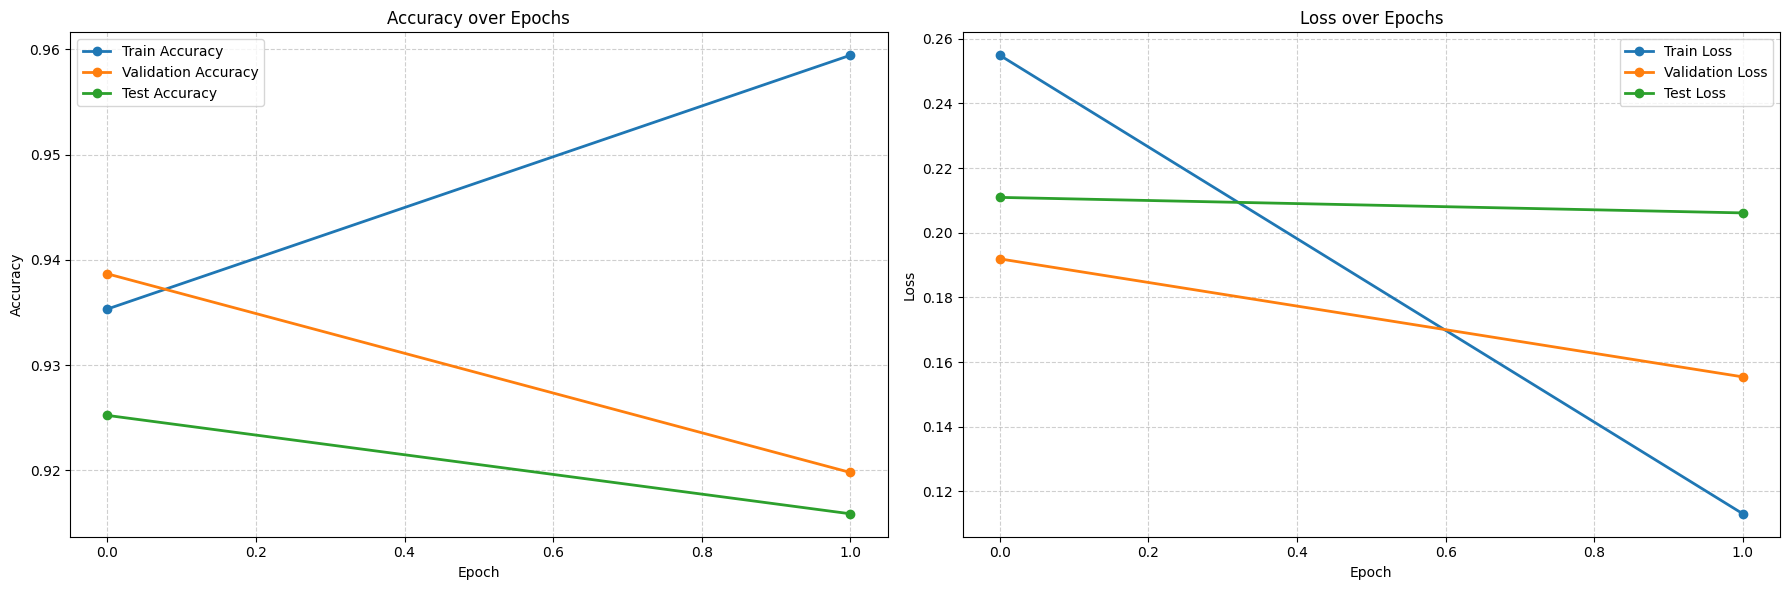

,precision,recall,f1-score,support
fracture,0.9643,0.9450,0.9545,200
normal,0.3889,0.5000,0.4375,14
accuracy,0.9159,0.9159,0.9159,1
macro avg,0.6766,0.7225,0.6960,214
weighted avg,0.9266,0.9159,0.9207,214


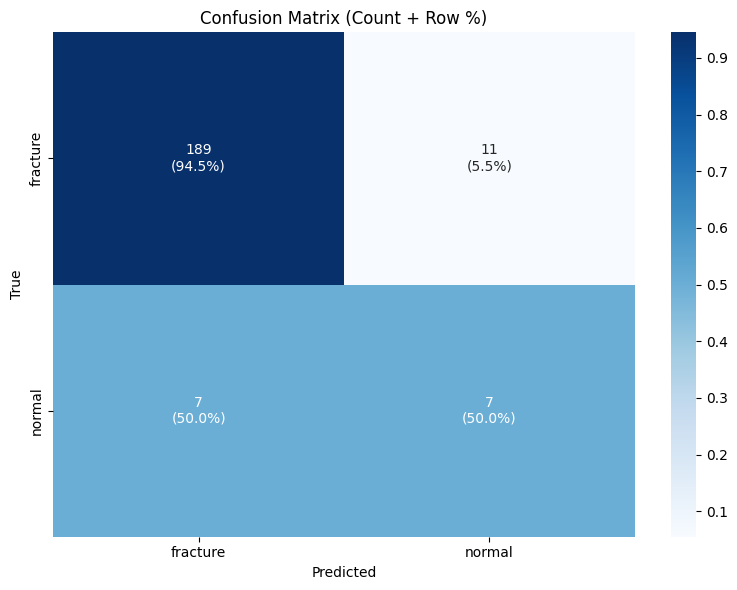

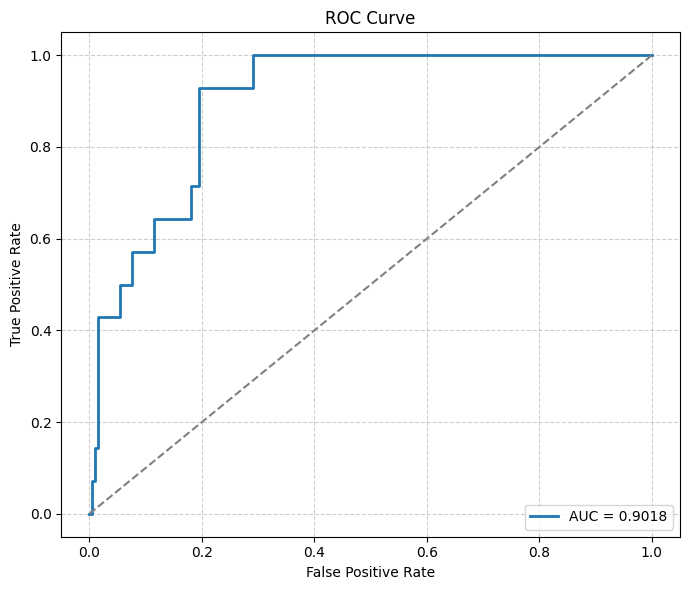

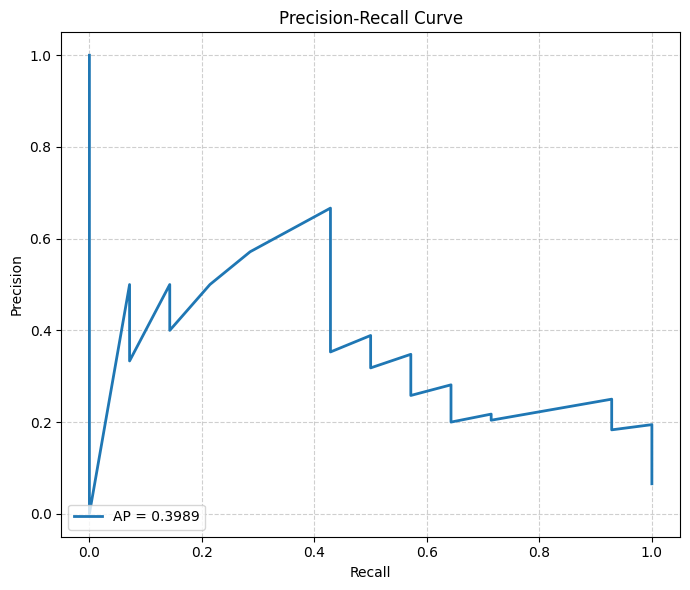

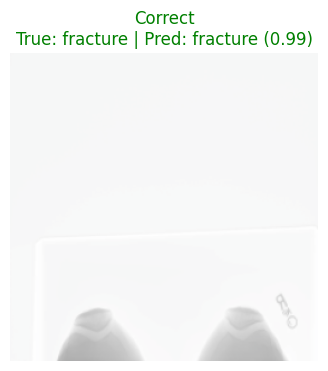

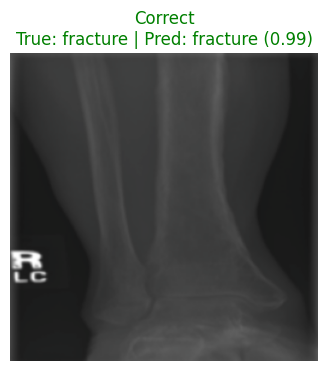

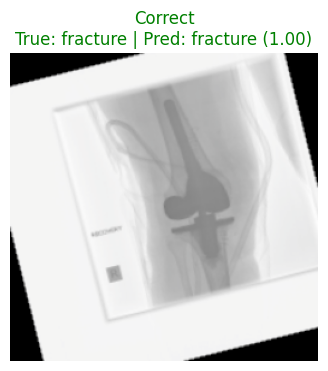

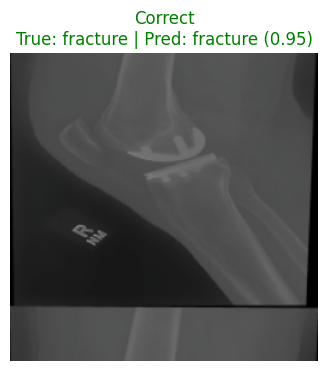

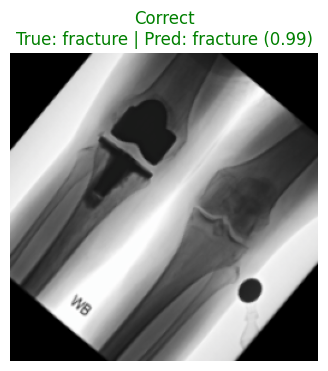

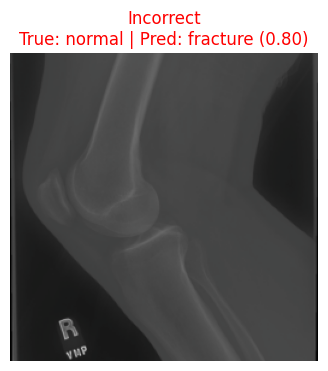

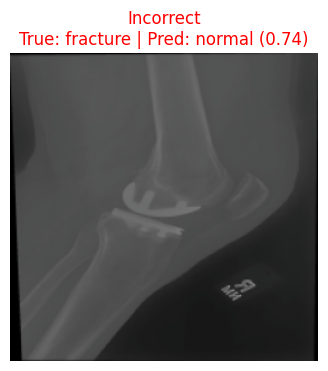

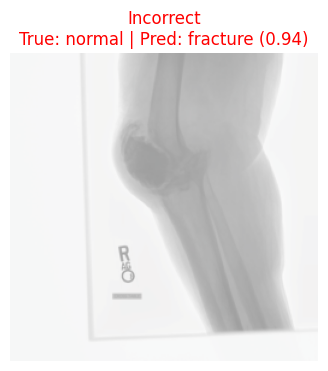

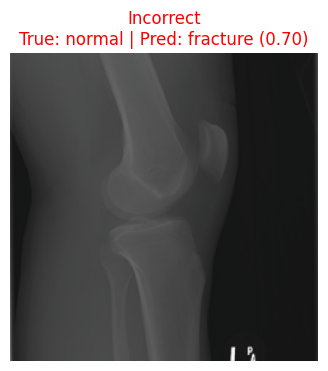

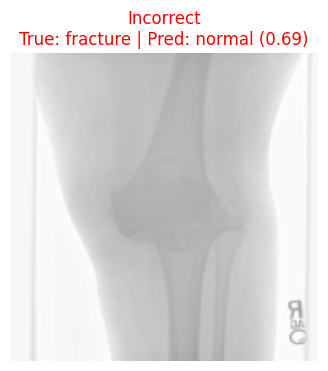

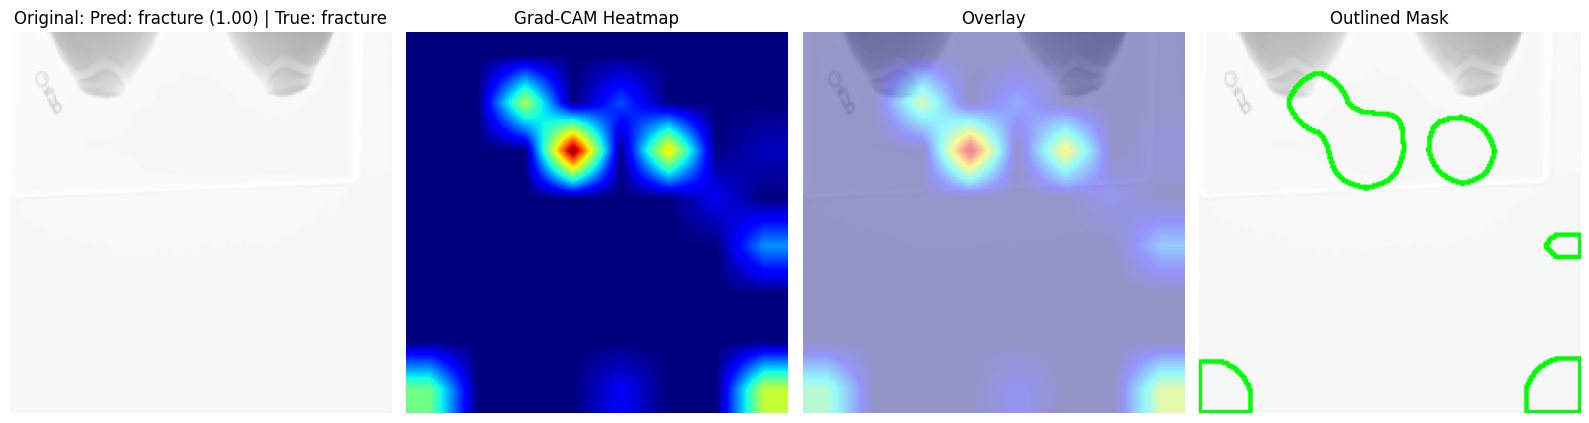

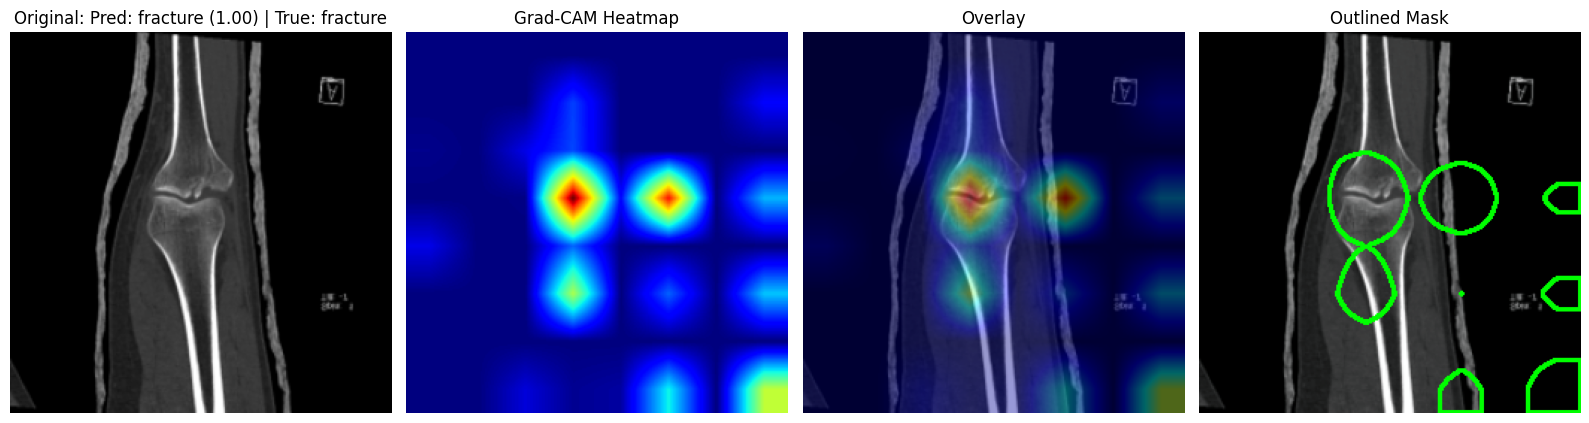

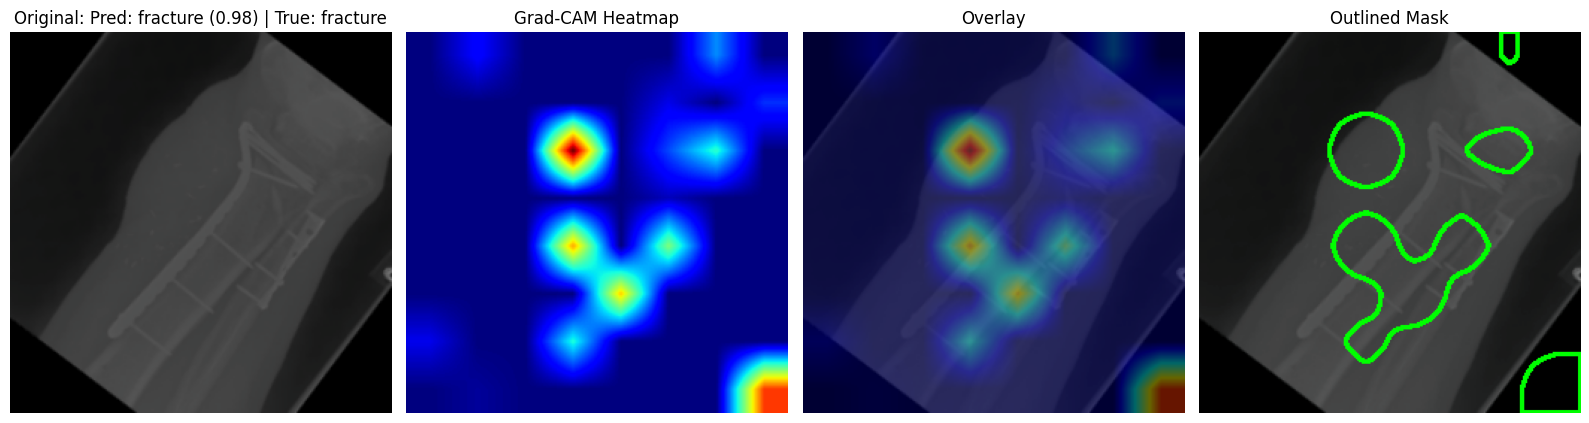

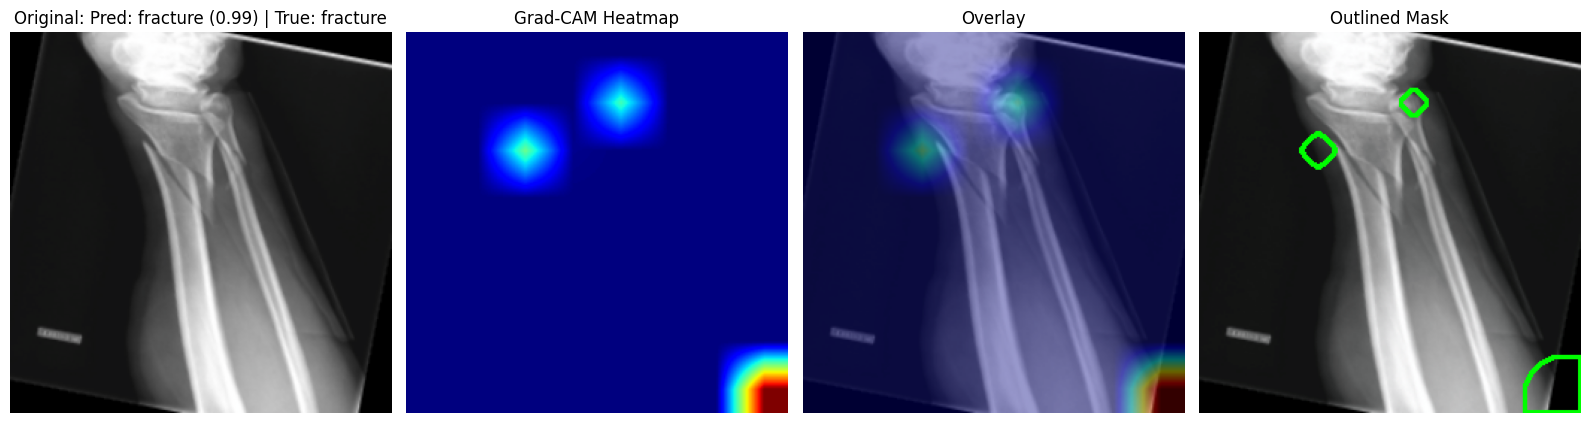

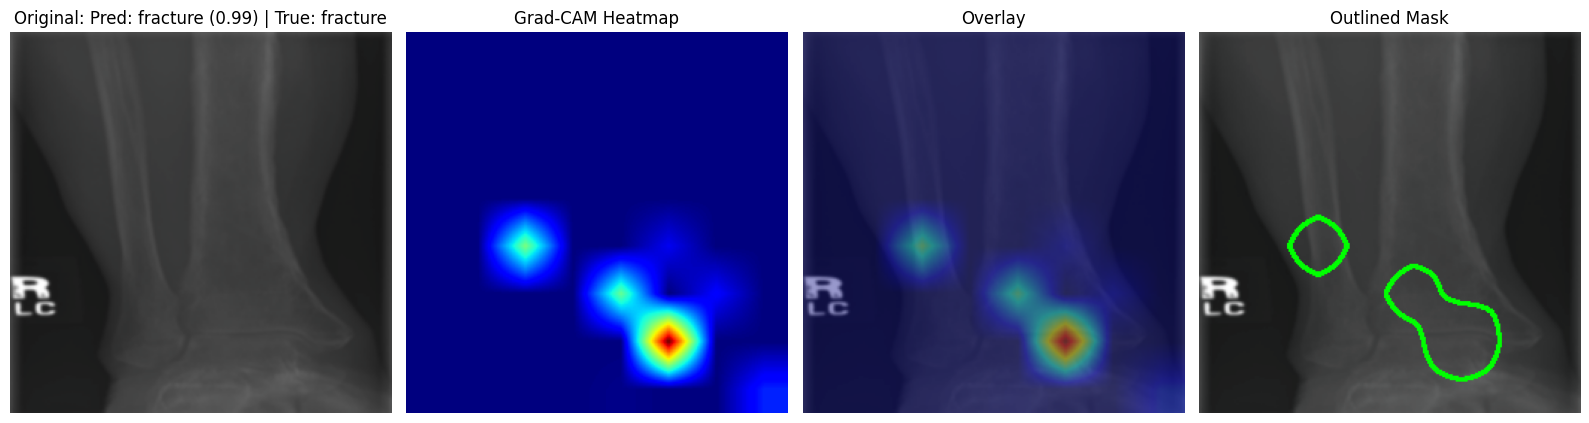

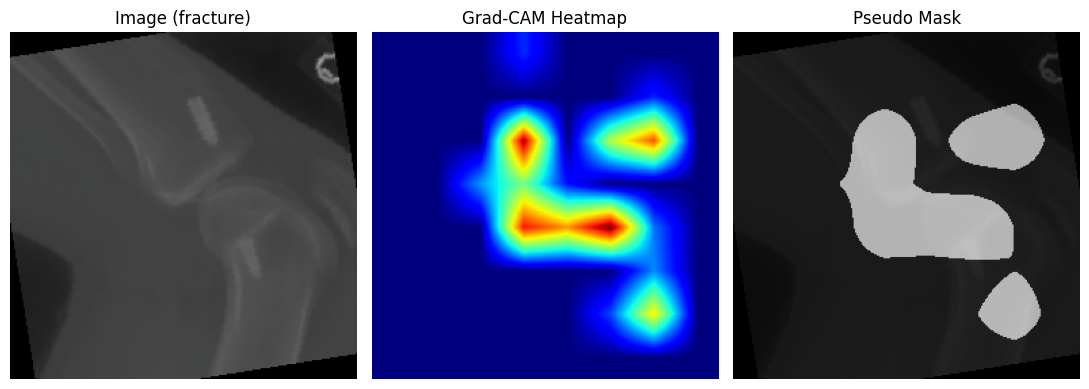

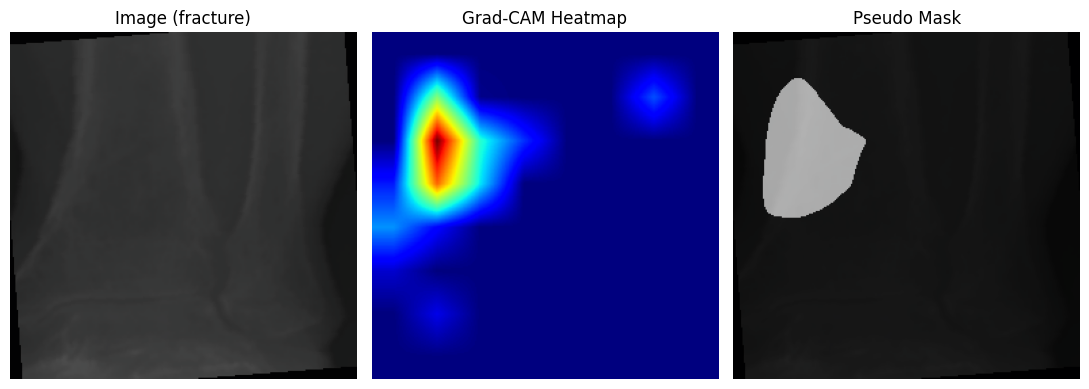

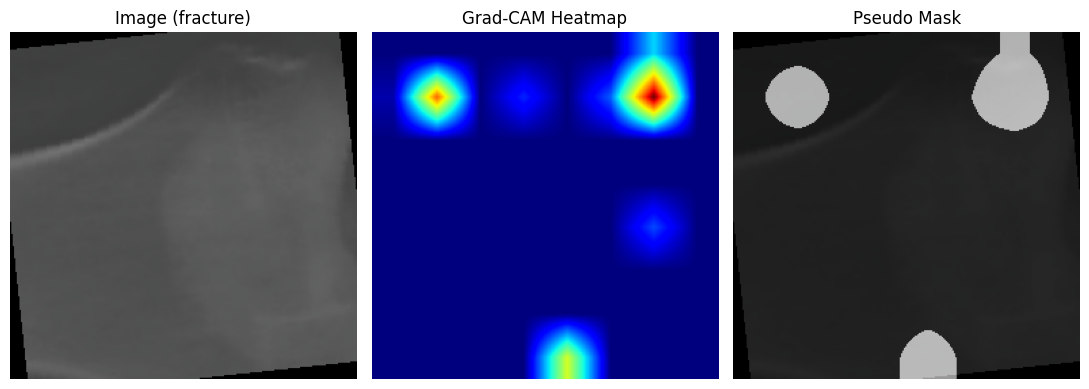

WeakSeg Epoch 1: 100%|██████████| 213/213 [02:22<00:00,  1.50it/s]


Epoch 1/2 - WeakSeg Loss: 1.5140


WeakSeg Epoch 2: 100%|██████████| 213/213 [02:21<00:00,  1.51it/s]


Epoch 2/2 - WeakSeg Loss: 1.4673


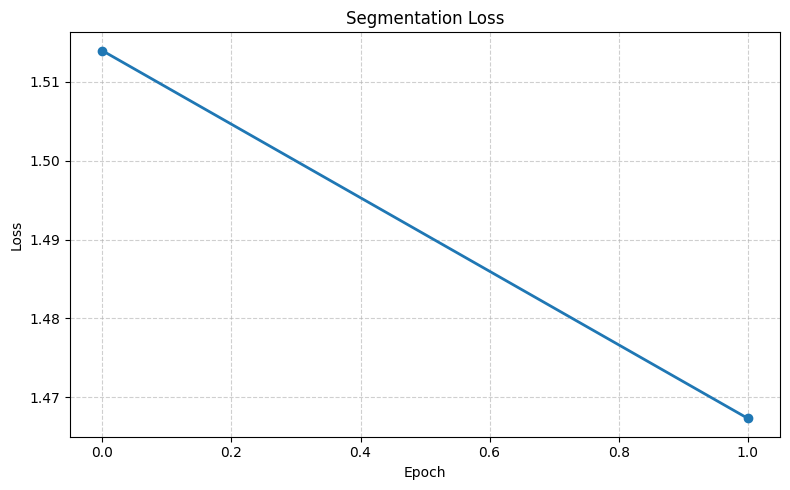

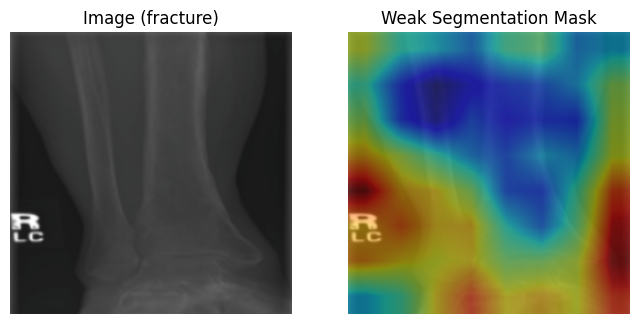

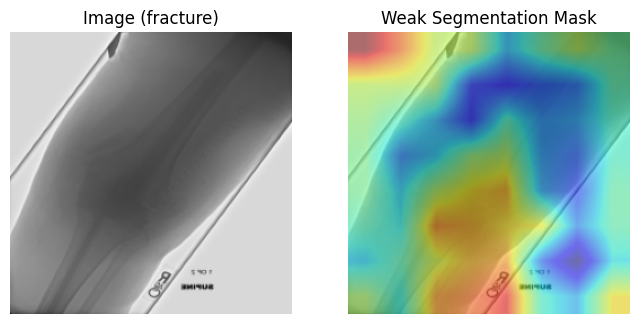

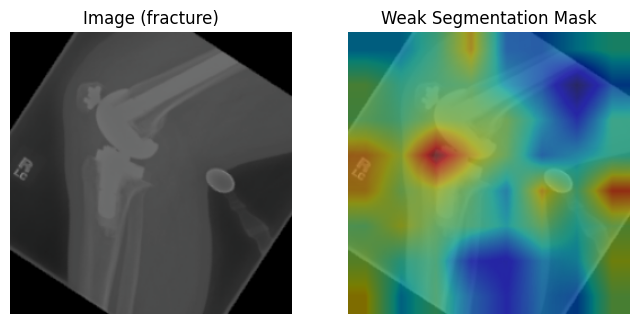

Validation: 100%|██████████| 107/107 [00:15<00:00,  7.03batch/s]


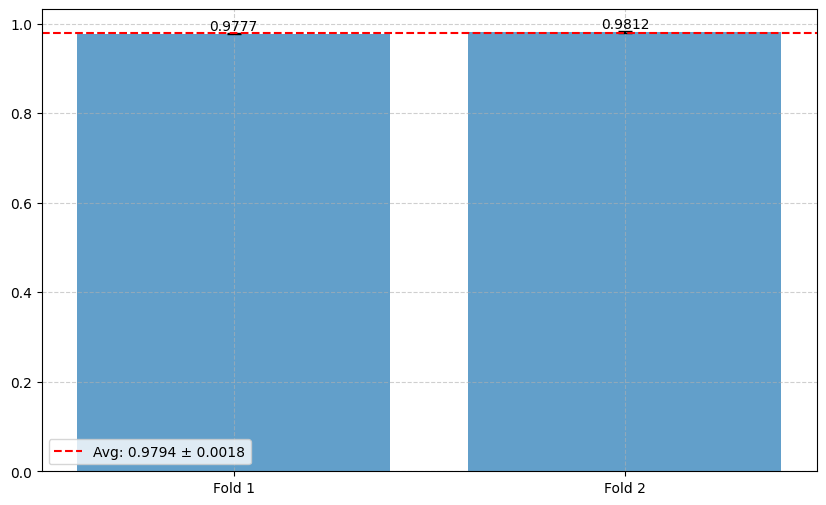

[I 2026-02-06 13:08:58,041] A new study created in memory with name: no-name-2f4bbb5a-bab5-4582-9cf8-d50f59864ebe
Validation: 100%|██████████| 27/27 [00:02<00:00,  9.40batch/s]
[I 2026-02-06 13:10:48,062] Trial 0 finished with value: 0.9481132075471698 and parameters: {'nhead': 8, 'dropout': 0.23237879594642452, 'lr': 0.00011780255126299683, 'weight_decay': 1.2085806642900938e-05}. Best is trial 0 with value: 0.9481132075471698.
Validation: 100%|██████████| 27/27 [00:02<00:00,  9.24batch/s]
[I 2026-02-06 13:12:35,920] Trial 1 finished with value: 0.9339622641509434 and parameters: {'nhead': 16, 'dropout': 0.12261919355650025, 'lr': 1.7201222303072896e-05, 'weight_decay': 0.0005877244985706319}. Best is trial 0 with value: 0.9481132075471698.


In [ ]:
def main():
    """Main execution pipeline"""

    # 🚀 START
    stage("🚀 Bone Fracture Detection Pipeline", "End-to-end training, evaluation, and visualization")

    if CFG.FAST_MODE:
        card("⚡ Fast mode enabled: reduced epochs/trials for quick iteration", "#fde047")

    # =========================
    # Phase 1: Data Preparation
    # =========================
    stage("Phase 1: Data Preparation", "Load data, apply transforms, and build dataloaders", "#a5b4fc")

    data_path = DatasetManager.load_dataset(CFG.DATA_PATH)
    image_datasets = DatasetManager.create_dataset_splits(data_path, CFG.IMAGE_SIZE)
    dataloaders, dataset_sizes, class_names = DatasetManager.create_dataloaders(
        image_datasets, CFG.BATCH_SIZE
    )
    DatasetManager.prepare_metadata(image_datasets)

    card(
        f"✅ Data ready | "
        f"Train: {dataset_sizes['train']} | "
        f"Val: {dataset_sizes['val']} | "
        f"Test: {dataset_sizes['test']} | "
        f"Classes: {class_names}",
        "#34d399"
    )

    # =========================
    # Phase 2: Model Setup
    # =========================
    stage("Phase 2: Model Construction", "Initialize CNN-Transformer model", "#facc15")

    model = HybridModel(
        CFG.MODEL_NAME, CFG.NUM_CLASSES, CFG.D_MODEL,
        CFG.NHEAD, CFG.NUM_ENCODER_LAYERS,
        CFG.DIM_FEEDFORWARD, CFG.DROPOUT
    ).to(CFG.device)

    ModelUtils.initialize_weights(model)
    ModelUtils.freeze_backbone(model)

    card(f"✅ Model initialized on {CFG.device}", "#34d399")

    # =========================
    # Phase 3: Training
    # =========================
    stage("Phase 3: Training", "Fit the model on training data", "#fb7185")

    criterion = ModelUtils.get_loss_function()
    optimizer = ModelUtils.get_optimizer(model, CFG.LEARNING_RATE)
    scheduler = ModelUtils.get_lr_scheduler(optimizer, epochs=CFG.EPOCHS)

    history = dict(train_loss=[], train_acc=[], val_loss=[], val_acc=[], test_loss=[], test_acc=[])
    best_val_acc = 0.0
    best_val_loss = float("inf")
    patience_counter = 0

    for epoch in range(CFG.EPOCHS):
        card(f"🔄 Epoch {epoch+1}/{CFG.EPOCHS}", "#60a5fa")

        # 🔓 Unfreeze backbone halfway
        if epoch == CFG.EPOCHS // 2:
            card("🔓 Unfreezing backbone + LR decay", "#fde047")
            ModelUtils.unfreeze_backbone(model)
            optimizer = ModelUtils.get_optimizer(model, CFG.LEARNING_RATE * 0.1)
            scheduler = ModelUtils.get_lr_scheduler(
                optimizer, epochs=CFG.EPOCHS - epoch
            )

        train_loss, train_acc = TrainingUtils.train_one_epoch(
            model,
            dataloaders['train'],
            criterion,
            optimizer,
            CFG.device
        )

        val_loss, val_acc, _, _, _ = TrainingUtils.evaluate(
            model,
            dataloaders['val'],
            criterion,
            CFG.device,
            split="Validation"
        )

        test_loss, test_acc, _, _, _ = TrainingUtils.evaluate(
            model,
            dataloaders['test'],
            criterion,
            CFG.device,
            split="Test"
        )

        scheduler.step()

        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['test_loss'].append(test_loss)
        history['test_acc'].append(test_acc)

        card(
            f"📊 Train Acc: {train_acc:.4f} | "
            f"Val Acc: {val_acc:.4f} | "
            f"Test Acc: {test_acc:.4f} | "
            f"Train Loss: {train_loss:.4f} | "
            f"Val Loss: {val_loss:.4f} | "
            f"Test Loss: {test_loss:.4f}",
            "#22d3ee"
        )

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            ModelUtils.save_checkpoint(
                model, optimizer, epoch, val_acc,
                os.path.join(CFG.OUTPUT_DIR, "best_model.pth")
            )
            card(f"💾 New best model saved (Val Acc: {val_acc:.4f})", "#4ade80")

        if val_loss < (best_val_loss - CFG.EARLY_STOPPING_MIN_DELTA):
            best_val_loss = val_loss
            patience_counter = 0
            ModelUtils.save_checkpoint(
                model, optimizer, epoch, val_acc,
                os.path.join(CFG.OUTPUT_DIR, "best_model_by_loss.pth")
            )
            card(f"📉 New best loss checkpoint saved (Val Loss: {val_loss:.4f})", "#a78bfa")
        else:
            patience_counter += 1

        if CFG.EARLY_STOPPING and patience_counter >= CFG.EARLY_STOPPING_PATIENCE:
            card("⏹️ Early stopping triggered (validation loss plateau)", "#f97316")
            break

    # =========================
    # Phase 4: Evaluation
    # =========================
    stage("Phase 4: Evaluation", "Run validation and testing metrics", "#c084fc")

    best_model = HybridModel(
        CFG.MODEL_NAME, CFG.NUM_CLASSES, CFG.D_MODEL,
        CFG.NHEAD, CFG.NUM_ENCODER_LAYERS,
        CFG.DIM_FEEDFORWARD, CFG.DROPOUT
    ).to(CFG.device)

    loss_ckpt = os.path.join(CFG.OUTPUT_DIR, "best_model_by_loss.pth")
    acc_ckpt = os.path.join(CFG.OUTPUT_DIR, "best_model.pth")
    checkpoint_path = loss_ckpt if CFG.USE_BEST_LOSS_CHECKPOINT and os.path.exists(loss_ckpt) else acc_ckpt
    best_model = ModelUtils.load_best_model(best_model, checkpoint_path)
    card(f"📦 Loaded checkpoint: {os.path.basename(checkpoint_path)}", "#c4b5fd")

    test_loss, test_acc, labels, preds, probs = TrainingUtils.test_inference(
        best_model, dataloaders['test'], criterion, CFG.device
    )

    metrics = MetricsAndVisualization.compute_metrics(labels, preds, probs)

    card(
        f"✅ Test Results | "
        f"Acc: {metrics['accuracy']:.4f} | "
        f"Prec: {metrics['precision']:.4f} | "
        f"Recall: {metrics['recall']:.4f} | "
        f"F1: {metrics['f1']:.4f} | "
        f"AUC: {metrics['auc']:.4f}",
        "#34d399"
    )

    stage("Accuracy & Loss Curves", "Train/Val/Test over epochs", "#60a5fa")
    MetricsAndVisualization.plot_curves(history)

    stage("Classification Report", "Per-class precision/recall/F1", "#93c5fd")
    MetricsAndVisualization.display_classification_report(labels, preds, class_names)

    stage("Confusion Matrix", "Refined count + row %", "#93c5fd")
    MetricsAndVisualization.plot_confusion_matrix(labels, preds, class_names)

    stage("ROC Curve", "Receiver Operating Characteristic", "#fda4af")
    MetricsAndVisualization.plot_roc_curve(labels, probs)

    stage("Precision-Recall Curve", "Precision vs Recall", "#fda4af")
    MetricsAndVisualization.plot_pr_curve(labels, probs)

    stage("Prediction Samples", "Correct vs incorrect examples", "#fda4af")
    MetricsAndVisualization.analyze_predictions(
        best_model, dataloaders['test'], class_names, CFG.device
    )

    # =========================
    # Phase 4.5: Grad-CAM
    # =========================
    stage(
        "Phase 4.5: Grad-CAM (Gradient-weighted Class Activation Mapping)",
        "Localize fracture regions with precise Grad-CAM notation",
        "#fb7185",
    )
    GradCAMUtils.generate_and_save_gradcam_samples(
        best_model, dataloaders['test'],
        class_names, CFG.device, num_samples=5
    )

    # =========================
    # Phase 4.75: Weak Segmentation
    # =========================
    if CFG.RUN_WEAK_SEG:
        stage(
            "Phase 4.75: Weak Segmentation",
            "Generate pseudo masks and train a weakly supervised mask head",
            "#38bdf8",
        )
        stage("Pseudo-Mask Preview", "Grad-CAM heatmaps → pseudo masks", "#67e8f9")
        visualize_pseudo_masks(best_model, dataloaders["train"], class_names)
        seg_model, seg_history = train_weak_segmentation(
            best_model, dataloaders, class_names
        )
        stage("Weak Segmentation Loss", "Pseudo-mask training curve", "#67e8f9")
        plot_segmentation_loss(seg_history)
        stage("Weak Segmentation Outputs", "Separate visualization of predicted masks", "#22d3ee")
        visualize_segmentation_sample(seg_model, dataloaders['test'], class_names)

    # =========================
    # Phase 4.9: Full Segmentation (Mask-Supervised)
    # =========================
    if CFG.RUN_FULL_SEG:
        stage(
            "Phase 4.9: Full Segmentation",
            "Mask-supervised segmentation (pixel-level)",
            "#14b8a6",
        )
        loaders = load_segmentation_dataloaders(CFG.SEG_DATA_PATH, CFG.IMAGE_SIZE, CFG.BATCH_SIZE)
        if loaders is None:
            card("⚠️ No segmentation masks found. Creating pseudo masks for segmentation training.", "#f59e0b")
            create_pseudo_mask_dataset(best_model, dataloaders, CFG.SEG_PSEUDO_MASK_DIR)
            loaders = load_segmentation_dataloaders(CFG.SEG_PSEUDO_MASK_DIR, CFG.IMAGE_SIZE, CFG.BATCH_SIZE)

        if loaders is not None:
            full_seg_model, full_seg_history = train_full_segmentation(loaders)
            stage("Full Segmentation Loss", "Boundary-aware training curve", "#34d399")
            plot_segmentation_loss(full_seg_history)
            stage("Full Segmentation Outputs", "Ground truth vs prediction", "#34d399")
            visualize_full_segmentation(full_seg_model, loaders['test'])

    # =========================
    # Phase 5: Robustness
    # =========================
    stage("Phase 5: Robustness & Optimization", "K-folds, hyperparameter tuning, calibration", "#22d3ee")

    folds = AdvancedTechniques.k_fold_cross_validation(
        CFG.DATA_PATH, CFG.IMAGE_SIZE, CFG.BATCH_SIZE
    )
    stage("K-Fold Results", "Mean accuracy across folds", "#38bdf8")
    AdvancedTechniques.plot_kfold_results(folds)

    trials = CFG.FAST_TRIALS if CFG.FAST_MODE else 2
    best_params = AdvancedTechniques.hyperparameter_tuning(
        dataloaders['train'], dataloaders['val'], n_trials=trials
    )

    card(f"⚙️ Best Hyperparameters: {best_params}", "#a7f3d0")

    ece = AdvancedTechniques.evaluate_model_calibration(
        best_model, dataloaders['test'], CFG.device
    )
    card(f"📐 Calibration ECE: {ece:.4f}", "#fda4af")

    card("🎉 Pipeline completed successfully!", "#4ade80")


if __name__ == "__main__":
    main()
